# Section 20 Capstone: Story Telling
## Animal Bites data 
### https://www.kaggle.com/datasets/rtatman/animal-bites?resource=download
#### From Weina Ke, 5/27/2023

## Targeting curious non-technical public

In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

It's really interesting to see what animals bites human, the mere concept is interesting to public. This project aims to provide some information on how to avoid animal bites if possible, and what to expect after bites.

#### Consider our beloved fluffy family member can't talk directly to us, I want to ask in general when to give
#### them more personal spaces, does genders have differrent preference, and which part of my body should I take
#### extra caution

In [104]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### Read the dataset and show details

#### Content:
Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

###### bite_date: The date the bite occurred
###### SpeciesIDDesc: The species of animal that did the biting
###### BreedIDDesc: Breed (if known)
###### GenderIDDesc: Gender (of the animal)
###### color: color of the animal
###### vaccination_yrs: how many years had passed since the last vaccination
###### vaccination_date: the date of the last vaccination
###### victim_zip: the zipcode of the victim
###### AdvIssuedYNDesc: whether advice was issued
###### WhereBittenIDDesc: Where on the body the victim was bitten
###### quarantine_date: whether the animal was quarantined
###### DispositionIDDesc: whether the animal was released from quarantine
###### head_sent_date: the date the animal’s head was sent to the lab
###### release_date: the date the animal was released
###### ResultsIDDesc: results from lab tests (for rabies)

In [5]:
raw_dataset = pd.read_csv("Health_AnimalBites.csv")
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


#### Check how many unique values are in these columns

In [25]:
# Count the unique values in each column
column_counts = raw_dataset.nunique().sort_values()

# Display the number of unique values for each column
print(column_counts)

AdvIssuedYNDesc         2
GenderIDDesc            3
WhereBittenIDDesc       3
ResultsIDDesc           3
vaccination_yrs         4
DispositionIDDesc       4
SpeciesIDDesc           9
BreedIDDesc           101
victim_zip            233
head_sent_date        325
release_date          582
quarantine_date       602
color                 712
vaccination_date     2107
bite_date            2702
dtype: int64


#### Seems like there are even reports without information about the animal...
#### Among the infos, ones that is of most interest are species, where bitten, gender of the animal
#### Let's first see the data

In [18]:
# Check the first few rows of the DataFrame
raw_dataset.head(2)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN


In [40]:
filtered_dataset = raw_dataset.dropna(subset=['SpeciesIDDesc',
                                              'GenderIDDesc',
                                              'WhereBittenIDDesc',
                                              'bite_date'
                                             ])

In [41]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 9001
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          6249 non-null   object 
 1   SpeciesIDDesc      6249 non-null   object 
 2   BreedIDDesc        2950 non-null   object 
 3   GenderIDDesc       6249 non-null   object 
 4   color              5484 non-null   object 
 5   vaccination_yrs    3343 non-null   float64
 6   vaccination_date   3667 non-null   object 
 7   victim_zip         5161 non-null   object 
 8   AdvIssuedYNDesc    2056 non-null   object 
 9   WhereBittenIDDesc  6249 non-null   object 
 10  quarantine_date    1825 non-null   object 
 11  DispositionIDDesc  1500 non-null   object 
 12  head_sent_date     130 non-null    object 
 13  release_date       1287 non-null   object 
 14  ResultsIDDesc      1294 non-null   object 
dtypes: float64(1), object(14)
memory usage: 781.1+ KB


#### Let's find out what animals are there

In [36]:
# Explore unique values in categorical columns
print(filtered_dataset['SpeciesIDDesc'].value_counts())

DOG        5194
CAT        1032
BAT          14
OTHER         3
RACCOON       2
HORSE         2
SKUNK         1
FERRET        1
Name: SpeciesIDDesc, dtype: int64


Not suprising, since dog and cat are most commonly seem pets, and most likely in contact with human
Let's focus on Dog and Cat

In [45]:
filtered_dataset_dc = filtered_dataset[
    (filtered_dataset['SpeciesIDDesc'] == 'DOG') |
    (filtered_dataset['SpeciesIDDesc'] == 'CAT')
]

In [48]:
filtered_dataset_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6226 entries, 0 to 9001
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          6226 non-null   object 
 1   SpeciesIDDesc      6226 non-null   object 
 2   BreedIDDesc        2950 non-null   object 
 3   GenderIDDesc       6226 non-null   object 
 4   color              5477 non-null   object 
 5   vaccination_yrs    3342 non-null   float64
 6   vaccination_date   3666 non-null   object 
 7   victim_zip         5140 non-null   object 
 8   AdvIssuedYNDesc    2040 non-null   object 
 9   WhereBittenIDDesc  6226 non-null   object 
 10  quarantine_date    1820 non-null   object 
 11  DispositionIDDesc  1485 non-null   object 
 12  head_sent_date     116 non-null    object 
 13  release_date       1286 non-null   object 
 14  ResultsIDDesc      1277 non-null   object 
dtypes: float64(1), object(14)
memory usage: 778.2+ KB


#### Seems like there are something interesting with the date info

In [53]:
print(filtered_dataset_dc['bite_date'].max())
print(filtered_dataset_dc['bite_date'].min())

5013-07-15 00:00:00
1952-05-28 00:00:00


#### Let's make the bite date range from the context, 1985 to 2017

In [105]:
# Convert 'bite_date' column to datetime data type
filtered_dataset_dc['bite_date'] = pd.to_datetime(filtered_dataset_dc['bite_date'], errors='coerce')

# Filter rows based on 'bite_date' range and valid datetime values
filtered_dataset_dc_filtered = filtered_dataset_dc[
    (filtered_dataset_dc['bite_date'].dt.year >= 1985) &
    (filtered_dataset_dc['bite_date'].dt.year <= 2017) &
    (~filtered_dataset_dc['bite_date'].isnull())
]



In [106]:
# Convert 'bite_date' column to datetime data type
filtered_dataset_dc_filtered['bite_date'] = pd.to_datetime(
    filtered_dataset_dc_filtered['bite_date'], errors='coerce')

# Extract year and month from 'bite_date' column
filtered_dataset_dc_filtered['Year'] = filtered_dataset_dc_filtered['bite_date'].dt.year
filtered_dataset_dc_filtered['Month'] = filtered_dataset_dc_filtered['bite_date'].dt.month
filtered_dataset_dc_filtered['Day'] = filtered_dataset_dc_filtered['bite_date'].dt.day

# Display the updated DataFrame with 'Year' and 'Month' columns
print(filtered_dataset_dc_filtered[['bite_date', 'Year', 'Month', 'Day']])


      bite_date  Year  Month  Day
0    1985-05-05  1985      5    5
1    1986-02-12  1986      2   12
2    1987-05-07  1987      5    7
3    1988-10-02  1988     10    2
4    1989-08-29  1989      8   29
...         ...   ...    ...  ...
8995 2017-09-04  2017      9    4
8997 2017-09-06  2017      9    6
8999 2017-09-07  2017      9    7
9000 2017-09-07  2017      9    7
9001 2017-09-07  2017      9    7

[6216 rows x 4 columns]


In [62]:
filtered_dataset_dc_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6216 entries, 0 to 9001
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          6216 non-null   datetime64[ns]
 1   SpeciesIDDesc      6216 non-null   object        
 2   BreedIDDesc        2944 non-null   object        
 3   GenderIDDesc       6216 non-null   object        
 4   color              5467 non-null   object        
 5   vaccination_yrs    3336 non-null   float64       
 6   vaccination_date   3660 non-null   object        
 7   victim_zip         5133 non-null   object        
 8   AdvIssuedYNDesc    2039 non-null   object        
 9   WhereBittenIDDesc  6216 non-null   object        
 10  quarantine_date    1819 non-null   object        
 11  DispositionIDDesc  1483 non-null   object        
 12  head_sent_date     116 non-null    object        
 13  release_date       1283 non-null   object        
 14  ResultsI

#### Well we don't always recognize what zipcode we are in, nor can we 
#### spot if the animal is vaccinated
#### Althouhg we do have some knowlege on what popular breed of an animal is,
#### but we aren't always sure unless we are experts

In [229]:
filtered_dataset_dc_filtered_encoded = filtered_dataset_dc_filtered[
    [
        'Year',
        'Month',
        'Day',
        'SpeciesIDDesc',
        'GenderIDDesc',
        'BreedIDDesc',
        'color'        
    ]
]

In [228]:
filtered_dataset_dc_filtered_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6216 entries, 0 to 9001
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           6216 non-null   int64 
 1   Month          6216 non-null   int64 
 2   Day            6216 non-null   int64 
 3   SpeciesIDDesc  6216 non-null   object
 4   GenderIDDesc   6216 non-null   object
 5   BreedIDDesc    2944 non-null   object
 6   color          5467 non-null   object
dtypes: int64(3), object(4)
memory usage: 388.5+ KB


In [230]:
# Perform one-hot encoding for object columns
encoded_df = pd.get_dummies(filtered_dataset_dc_filtered_encoded)

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

print(correlation_matrix)

                       Year     Month       Day  SpeciesIDDesc_CAT  \
Year               1.000000 -0.079743  0.000975          -0.020184   
Month             -0.079743  1.000000  0.003237           0.009317   
Day                0.000975  0.003237  1.000000           0.000085   
SpeciesIDDesc_CAT -0.020184  0.009317  0.000085           1.000000   
SpeciesIDDesc_DOG  0.020184 -0.009317 -0.000085          -1.000000   
...                     ...       ...       ...                ...   
color_YELLOW-TAN  -0.009023 -0.009598  0.019035          -0.005650   
color_YELLOW-WHT  -0.020644  0.001898  0.009996           0.009920   
color_YELLOW/BLK   0.008338  0.014463 -0.005126          -0.005650   
color_YELLOW/BRN  -0.004683  0.006442 -0.015075          -0.005650   
color_YELLOWISH   -0.013364 -0.009598 -0.012232          -0.005650   

                   SpeciesIDDesc_DOG  GenderIDDesc_FEMALE  GenderIDDesc_MALE  \
Year                        0.020184             0.066732           0.116853   

#### Non of these values really have correlation between each others,
#### like we aren't very likely to be bitten on 13th day of a month by a black cat
#### hence thery are more or less independent

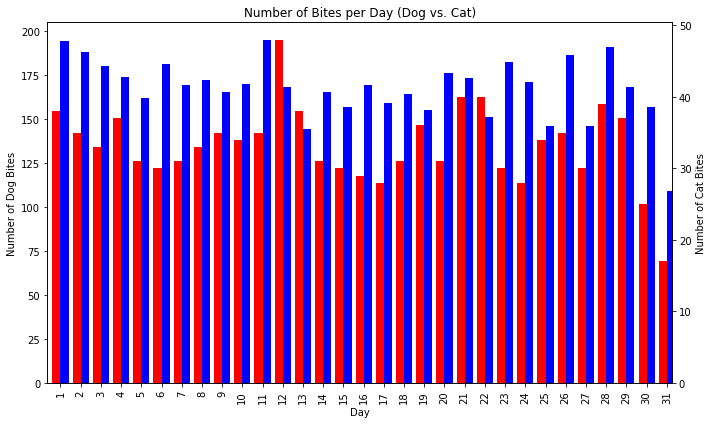

In [74]:
# Group by 'SpeciesIDDesc' and 'Day', and count the number of bites
bites_per_day = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'Day'])['Day'].count()

# Reset index to transform the resulting Series into a DataFrame
bites_per_day = bites_per_day.reset_index(name='Count')

# Pivot the DataFrame to have 'SpeciesIDDesc' as columns
bites_per_day_pivot = bites_per_day.pivot(index='Day', columns='SpeciesIDDesc', values='Count')

# Generate the bar plot with twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the dog bites on ax1
bites_per_day_pivot['DOG'].plot(kind='bar', color='blue', ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Number of Dog Bites')

# Plot the cat bites on ax2
bites_per_day_pivot['CAT'].plot(kind='bar', color='red', ax=ax2, position=1, width=0.4)
ax2.set_ylabel('Number of Cat Bites')

# Set x-axis label
ax1.set_xlabel('Day')

# Set title
plt.title('Number of Bites per Day (Dog vs. Cat)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


#### Seems like no difference by day? 31st is the last day, it's understandably low
#### Let's see if there's difference between each month

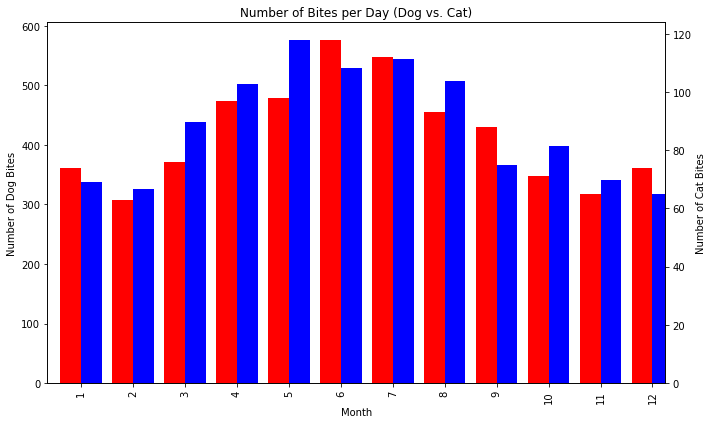

In [102]:
# Group by 'SpeciesIDDesc' and 'Day', and count the number of bites
bites_per_day = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'Month'])['Month'].count()

# Reset index to transform the resulting Series into a DataFrame
bites_per_day = bites_per_day.reset_index(name='Count')

# Pivot the DataFrame to have 'SpeciesIDDesc' as columns
bites_per_day_pivot = bites_per_day.pivot(index='Month', columns='SpeciesIDDesc', values='Count')

# Generate the bar plot with twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the dog bites on ax1
bites_per_day_pivot['DOG'].plot(kind='bar', color='blue', ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Number of Dog Bites')

# Plot the cat bites on ax2
bites_per_day_pivot['CAT'].plot(kind='bar', color='red', ax=ax2, position=1, width=0.4)
ax2.set_ylabel('Number of Cat Bites')

# Set x-axis label
ax1.set_xlabel('Month')

# Set title
plt.title('Number of Bites per Day (Dog vs. Cat)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


#### Interesting, seems like summer happened to be most bites happening for dog and cat. 
#### This kind of counterintuive as we assumes animals are most aggresive in springs when
#### animal estrus


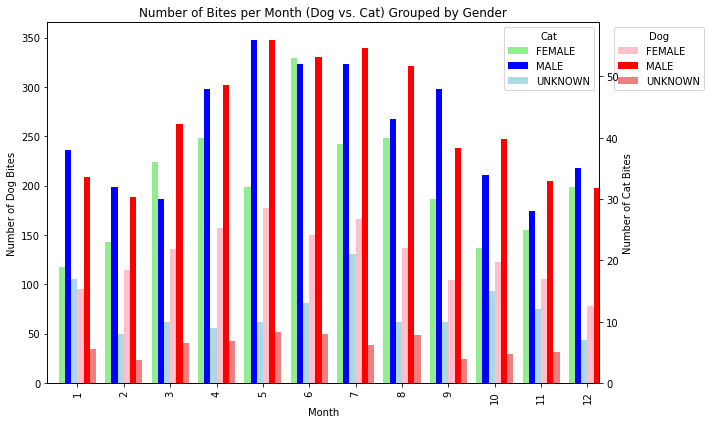

In [153]:
# Group by 'SpeciesIDDesc', 'GenderIDDesc', 'Month', and count the number of bites
bites_per_month_gender = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'GenderIDDesc', 'Month'])['Month'].count()

# Reset index to transform the resulting Series into a DataFrame
bites_per_month_gender = bites_per_month_gender.reset_index(name='Count')

# Pivot the DataFrame to have 'SpeciesIDDesc' and 'GenderIDDesc' as columns
bites_per_month_gender_pivot = bites_per_month_gender.pivot(index='Month', columns=['SpeciesIDDesc', 'GenderIDDesc'], values='Count')

# Generate the bar plot with larger legend area
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot the dog bites by gender on ax1
bites_per_month_gender_pivot['DOG'].plot(kind='bar', color=['pink', 'red', 'lightcoral'], ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Number of Dog Bites')

# Plot the cat bites by gender on ax2
bites_per_month_gender_pivot['CAT'].plot(kind='bar', color=['lightgreen', 'blue', 'lightblue'], ax=ax2, position=1, width=0.4)
ax2.set_ylabel('Number of Cat Bites')

# Set x-axis label
ax1.set_xlabel('Month')

# Set title
plt.title('Number of Bites per Month (Dog vs. Cat) Grouped by Gender')

# Set larger legend area
ax1.legend(title='Dog', bbox_to_anchor=(1.2, 1))
ax2.legend(title='Cat', bbox_to_anchor=(1, 1))

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


#### By looking into the gender difference, male shows more aggressive than female in general
#### though female cats on June had more reported case than male. Let's see if this trend holds
#### throughout the years

In [134]:
# Group by 'SpeciesIDDesc', 'GenderIDDesc', 'Month', and count the number of bites
bites_per_month_year_gender = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'GenderIDDesc', 'Month', 'Year'])['Year'].count()
# Reset index to transform the resulting Series into a DataFrame
bites_per_month_year_gender = bites_per_month_year_gender.reset_index(name='Count')

# Filter the DataFrame for FEMALE CAT
male_cat_my = bites_per_month_year_gender[(bites_per_month_year_gender[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender[
    'GenderIDDesc'] == 'MALE')]
female_cat_my = bites_per_month_year_gender[(bites_per_month_year_gender[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender[
    'GenderIDDesc'] == 'FEMALE')]
male_dog_my = bites_per_month_year_gender[(bites_per_month_year_gender[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender[
    'GenderIDDesc'] == 'MALE')]
female_dog_my = bites_per_month_year_gender[(bites_per_month_year_gender[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender[
    'GenderIDDesc'] == 'FEMALE')]

# Group by 'SpeciesIDDesc', 'GenderIDDesc', 'Month', and count the number of bites
bites_per_year_gender = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'GenderIDDesc', 'Year'])['Year'].count()
# Reset index to transform the resulting Series into a DataFrame
bites_per_year_gender = bites_per_year_gender.reset_index(name='Count')

# Filter the DataFrame for FEMALE CAT
male_cat_y = bites_per_year_gender[(bites_per_year_gender[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender[
    'GenderIDDesc'] == 'MALE')]
female_cat_y = bites_per_year_gender[(bites_per_year_gender[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender[
    'GenderIDDesc'] == 'FEMALE')]
male_dog_y = bites_per_year_gender[(bites_per_year_gender[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender[
    'GenderIDDesc'] == 'MALE')]
female_dog_y = bites_per_year_gender[(bites_per_year_gender[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender[
    'GenderIDDesc'] == 'FEMALE')]

In [136]:
def month_n(df, month):
    month_n = df[df['Month'] == month]
    return month_n    

#### Let's see June's trend for dogs

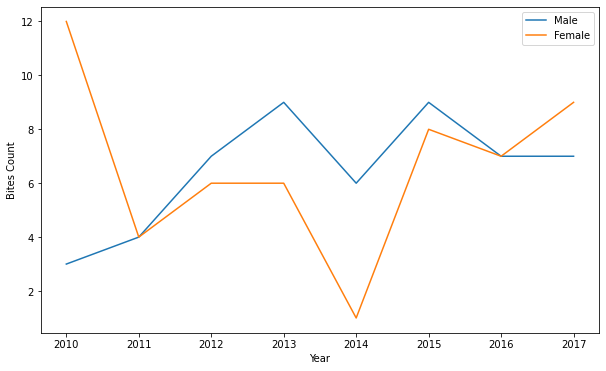

In [155]:
# Filter the DataFrame for FEMALE CAT
female = month_n(female_cat_my, 6)
male = month_n(male_cat_my, 6)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.plot(male['Year'], male['Count'], label='Male')
ax.plot(female['Year'], female['Count'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Bites Count')

# Show the legend
ax.legend()

# Show the plot
plt.show()


#### Seems like the ghigher number of counts is a result from reports in 2010.
#### Consider the small number of reports, it is less conclusive which gender of cat
#### is more likely to bite in June. Let's see the year trend of bites for Dog and Cat

#### Let's see cats first

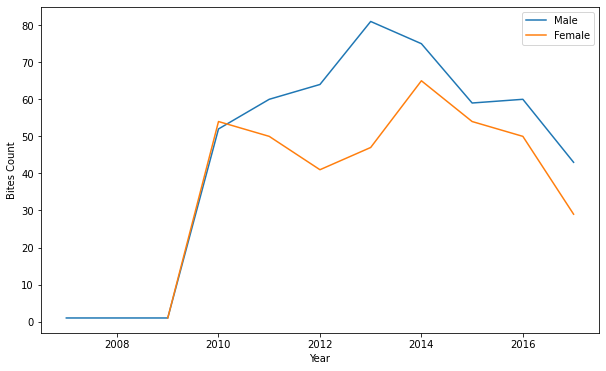

In [156]:
# Filter the DataFrame for 
female = female_cat_y
male = male_cat_y
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.plot(male['Year'], male['Count'], label='Male')
ax.plot(female['Year'], female['Count'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Bites Count')

# Show the legend
ax.legend()

# Show the plot
plt.show()

#### Seems like the number does not have a clear trend, and 
#### We see a dramatic increase in case number around 2019
#### This seems like new method to report or something, let's see dogs

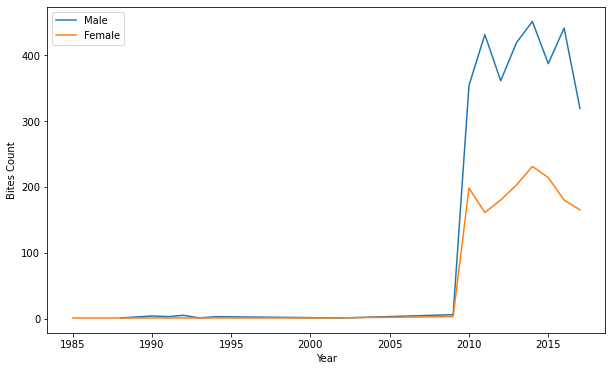

In [157]:
# Filter the DataFrame for 
female = female_dog_y
male = male_dog_y
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.plot(male['Year'], male['Count'], label='Male')
ax.plot(female['Year'], female['Count'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Bites Count')

# Show the legend
ax.legend()

# Show the plot
plt.show()

#### Interestingly the number also rocketed on 2010, let's split the grapth before and after the year
#### since this number is unlikely due to suddently a dramatic increase in animal owned by residents
#### as it's around financial crisis. https://www.nytimes.com/2008/10/18/nyregion/18pets.html#:~:text=Animal%20Care%20and%20Control%20took,the%20same%20months%20in%202007.

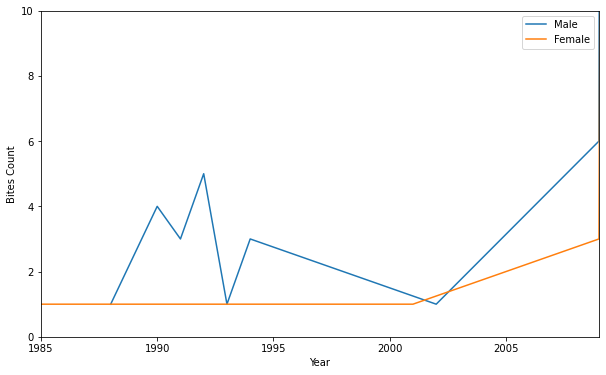

In [166]:
# Filter the DataFrame for 
female = female_dog_y
male = male_dog_y
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.plot(male['Year'], male['Count'], label='Male')
ax.plot(female['Year'], female['Count'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')
ax.set_xlim(1985, 2009)
ax.set_ylim(0, 10)
# Set the y-axis label
ax.set_ylabel('Bites Count')

# Show the legend
ax.legend()

# Show the plot
plt.show()

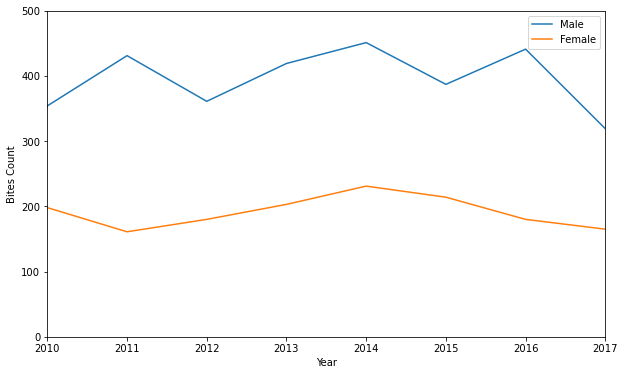

In [167]:
# Filter the DataFrame for 
female = female_dog_y
male = male_dog_y
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.plot(male['Year'], male['Count'], label='Male')
ax.plot(female['Year'], female['Count'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')
ax.set_xlim(2010, 2017)
ax.set_ylim(0, 500)
# Set the y-axis label
ax.set_ylabel('Bites Count')

# Show the legend
ax.legend()

# Show the plot
plt.show()

#### Besides this dramatic increase, not much trend can be observed from animal bites
#### as year passed by. Now let's see where do they like to bite

In [171]:
# Group by 'SpeciesIDDesc', 'GenderIDDesc', 'Month', and count the number of bites
bites_per_month_year_gender_bd = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'GenderIDDesc', 'Month', 'Year', 'WhereBittenIDDesc'])['Year'].count()
# Reset index to transform the resulting Series into a DataFrame
bites_per_month_year_gender_bd = bites_per_month_year_gender_bd.reset_index(name='Count')

# Filter the DataFrame for FEMALE CAT
male_cat_my_bd = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_cat_my_bd = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]
male_dog_my_bd = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_dog_my_bd = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]

# Group by 'SpeciesIDDesc', 'GenderIDDesc', 'Month', and count the number of bites
bites_per_year_gender_bd = filtered_dataset_dc_filtered.groupby(['SpeciesIDDesc', 'GenderIDDesc', 'WhereBittenIDDesc', 'Year'])['Year'].count()
# Reset index to transform the resulting Series into a DataFrame
bites_per_year_gender_bd = bites_per_year_gender_bd.reset_index(name='Count')

# Filter the DataFrame for FEMALE CAT
male_cat_y_bd = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_cat_y_bd = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]
male_dog_y_bd = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_dog_y_bd = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]

#### Let's see what options are in WhereBittenIDDesc

In [170]:
unique_values = female_dog_y_bd['WhereBittenIDDesc'].unique()
print(unique_values)

['BODY' 'HEAD' 'UNKNOWN']


In [225]:
male_cat_my_bd_bite = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_cat_my_bd_bite = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]
male_dog_my_bd_bite = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_dog_my_bd_bite = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]

male_cat_y_bd_bite = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_cat_y_bd_bite = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]
male_dog_y_bd_bite = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'MALE')]
female_dog_y_bd_bite = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE')]

male_cat_my_bd_Head = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'MALE') & (bites_per_month_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]
female_cat_my_bd_Head = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE') & (bites_per_month_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]
male_dog_my_bd_Head = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'MALE') & (bites_per_month_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]
female_dog_my_bd_Head = bites_per_month_year_gender_bd[(bites_per_month_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_month_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE') & (bites_per_month_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]

male_cat_y_bd_Head = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'MALE') & (bites_per_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]
female_cat_y_bd_Head = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'CAT') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE') & (bites_per_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]
male_dog_y_bd_Head = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'MALE') & (bites_per_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]
female_dog_y_bd_Head = bites_per_year_gender_bd[(bites_per_year_gender_bd[
    'SpeciesIDDesc'] == 'DOG') & (bites_per_year_gender_bd[
    'GenderIDDesc'] == 'FEMALE') & (bites_per_year_gender_bd[
    'WhereBittenIDDesc'] == 'HEAD')]

#### Bite on the head...?

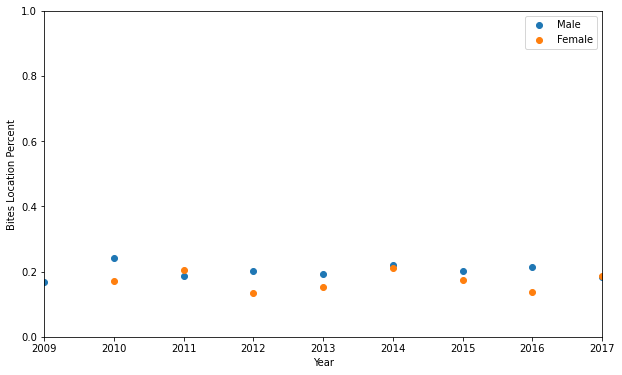

Male Dog Head Bite average percent: 0.3382123708672429
Male Dog Head Bite std percent:0.2968072957976407
Female Dog Head Bite average percent: 0.3374514893906366
Female Dog Head Bite std percent: 0.33216551837535907


In [222]:
# Filter the DataFrame for 
female = female_dog_y_bd_Head.groupby('Year', as_index=False).sum()
male = male_dog_y_bd_Head.groupby('Year', as_index=False).sum()

total_num_male = male_dog_y_bd_bite[['Year', 'Count']].groupby('Year', as_index=False).sum()
total_num_female = female_dog_y_bd_bite[['Year', 'Count']].groupby('Year', as_index=False).sum()

merged_df_m = male.merge(total_num_male, on='Year', how='inner')
merged_df_fm = female.merge(total_num_female, on='Year', how='inner')

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.scatter(merged_df_m['Year'], merged_df_m['Count_x']/merged_df_m['Count_y'], label='Male')
ax.scatter(merged_df_fm['Year'], merged_df_fm['Count_x']/merged_df_fm['Count_y'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')
ax.set_xlim(2009, 2017)
ax.set_ylim(0, 1)
# Set the y-axis label
ax.set_ylabel('Bites Location Percent')

# Show the legend
ax.legend()

# Show the plot
plt.show()

print("Male Dog Head Bite average percent: {}".format(np.mean(merged_df_m['Count_x']/merged_df_m['Count_y'])))
print("Male Dog Head Bite std percent:{}".format(np.std(merged_df_m['Count_x']/merged_df_m['Count_y'])))
print("Female Dog Head Bite average percent: {}".format(np.mean(merged_df_fm['Count_x']/merged_df_fm['Count_y'])))
print("Female Dog Head Bite std percent: {}".format(np.std(merged_df_fm['Count_x']/merged_df_fm['Count_y'])))

#### Very few, it is awful get bitten and especially on the head, 
#### it might be valuable to learn how to avoid being bitten by dog
#### on the head. Overall, female and male dogs do not show difference
#### on location bitten. Let's see cats.

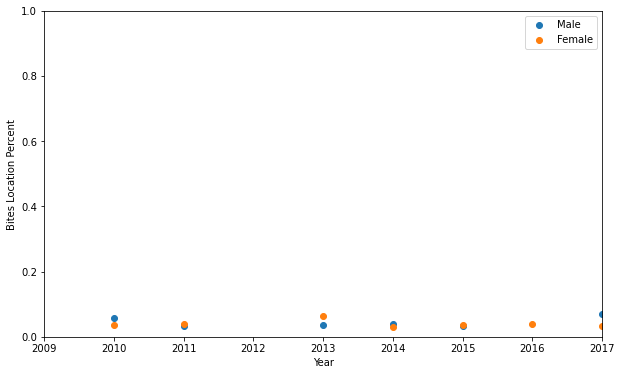

Male Cat Head Bite average percent: 0.04528807083464816
Male Cat Head Bite std percent:0.013673517361948828
Female Cat Head Bite average percent: 0.04045083581400529
Female Cat Head Bite std percent: 0.009997437822980156


In [224]:
# Filter the DataFrame for 
female = female_cat_y_bd_Head.groupby('Year', as_index=False).sum()
male = male_cat_y_bd_Head.groupby('Year', as_index=False).sum()

total_num_male = male_cat_y_bd_bite[['Year', 'Count']].groupby('Year', as_index=False).sum()
total_num_female = female_cat_y_bd_bite[['Year', 'Count']].groupby('Year', as_index=False).sum()

merged_df_m = male.merge(total_num_male, on='Year', how='inner')
merged_df_fm = female.merge(total_num_female, on='Year', how='inner')

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots
ax.scatter(merged_df_m['Year'], merged_df_m['Count_x']/merged_df_m['Count_y'], label='Male')
ax.scatter(merged_df_fm['Year'], merged_df_fm['Count_x']/merged_df_fm['Count_y'], label='Female')

# Set the x-axis label
ax.set_xlabel('Year')
ax.set_xlim(2009, 2017)
ax.set_ylim(0, 1)
# Set the y-axis label
ax.set_ylabel('Bites Location Percent')

# Show the legend
ax.legend()

# Show the plot
plt.show()

print("Male Cat Head Bite average percent: {}".format(np.mean(merged_df_m['Count_x']/merged_df_m['Count_y'])))
print("Male Cat Head Bite std percent:{}".format(np.std(merged_df_m['Count_x']/merged_df_m['Count_y'])))
print("Female Cat Head Bite average percent: {}".format(np.mean(merged_df_fm['Count_x']/merged_df_fm['Count_y'])))
print("Female Cat Head Bite std percent: {}".format(np.std(merged_df_fm['Count_x']/merged_df_fm['Count_y'])))

#### Same for cats, no significant difference between male and female
#### on location bitten

### Through investigating the dataset, hypothesis on pet bite are:
#### 1. Female house pet (dog and cat) are less likely to bite.
#### 2. Animals appears to bite in warmer days, as contrast to the common believe that animals are more aggressive in estrus
#### 3. Body are most likely to be bitten.